In [78]:
import pandas as pd
import numpy as np


DATA PRE-PROCESSING

In [79]:
df = pd.read_csv('Fraud.csv')

In [80]:
df.shape

(6362620, 11)

In [81]:
df.info() #getting the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [82]:
# Check for missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [83]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [84]:
df['isFraud'].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [85]:
frad_percentage = df['isFraud'].value_counts()[1]/len(df) * 100
not_frad_percentage = df['isFraud'].value_counts()[0]/len(df) * 100

print('Percentage of Fraud Transactions: ', frad_percentage)
print('Percentage of Non-Fraud/Legit Transactions: ', not_frad_percentage)


Percentage of Fraud Transactions:  0.12908204481801522
Percentage of Non-Fraud/Legit Transactions:  99.87091795518198


In [86]:
##coping the data into new dataframe

df_new = df.copy() 

ENCODING THE CATEGORICAL DATA

In [87]:
#checking for columns with object data type

list_of_attributes = df.select_dtypes(include=['object']).columns
list_of_attributes

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [88]:
## Encoding the categorical variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in list_of_attributes:
    df_new[i] = le.fit_transform(df_new[i].astype(str))

df_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [89]:
df_new.info() ##checking the data type of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


CHECKING THE MULTICOLINERITY PART

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


var_if = pd.DataFrame()
var_if["Features"] = df_new.columns
var_if["VIF Factor"] = [variance_inflation_factor(df_new.values, i) for i in range(df_new.shape[1])]

var_if
    

,Features,VIF Factor
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


Here we can see that the VIF factor of oldbalanceOrg & oldbalanceOrg and oldbalanceDest & newbalanceDest is very high, which means that there is multicollinearity present in the data. We can remove the columns with high VIF factor.

In [91]:
# Now we will combine these 4 rows into 2 rows and drop the original columns

#comnining the rows

df_new['origin_amount_new'] = df_new.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df_new['destination_amount_new'] = df_new.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)


#dropping the original columns

df_new.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'],axis=1,inplace=True)

In [92]:
df_new['TransactionPath'] = df_new.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

In [93]:
df_new = df_new.drop(['step','nameOrig','nameDest'],axis=1)


In [94]:
df_new.head()

,type,amount,isFraud,isFlaggedFraud,origin_amount_new,destination_amount_new,TransactionPath
0,3,9839.64,0,0,9839.64,0.0,2419963.0
1,3,1864.28,0,0,1864.28,0.0,3922922.0
2,4,181.00,1,0,181.00,0.0,1441841.0
3,1,181.00,1,0,181.00,21182.0,6219958.0
4,3,11668.14,0,0,11668.14,0.0,4274900.0


In [95]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   type                    int32  
 1   amount                  float64
 2   isFraud                 int64  
 3   isFlaggedFraud          int64  
 4   origin_amount_new       float64
 5   destination_amount_new  float64
 6   TransactionPath         float64
dtypes: float64(4), int32(1), int64(2)
memory usage: 315.5 MB


In [96]:
# Again calculating the VIF for the new dataframe

var_if_new = pd.DataFrame()
var_if_new["Features"] = df_new.columns
var_if_new["VIF Factor"] = [variance_inflation_factor(df_new.values, i) for i in range(df_new.shape[1])]



In [97]:
var_if_new

,Features,VIF Factor
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,origin_amount_new,1.307910
5,destination_amount_new,3.754335
6,TransactionPath,2.677167


As we can see now the VIF has decreased so now we can proceed to next step

Now we will calculate the Coorelation between columns

<Axes: >

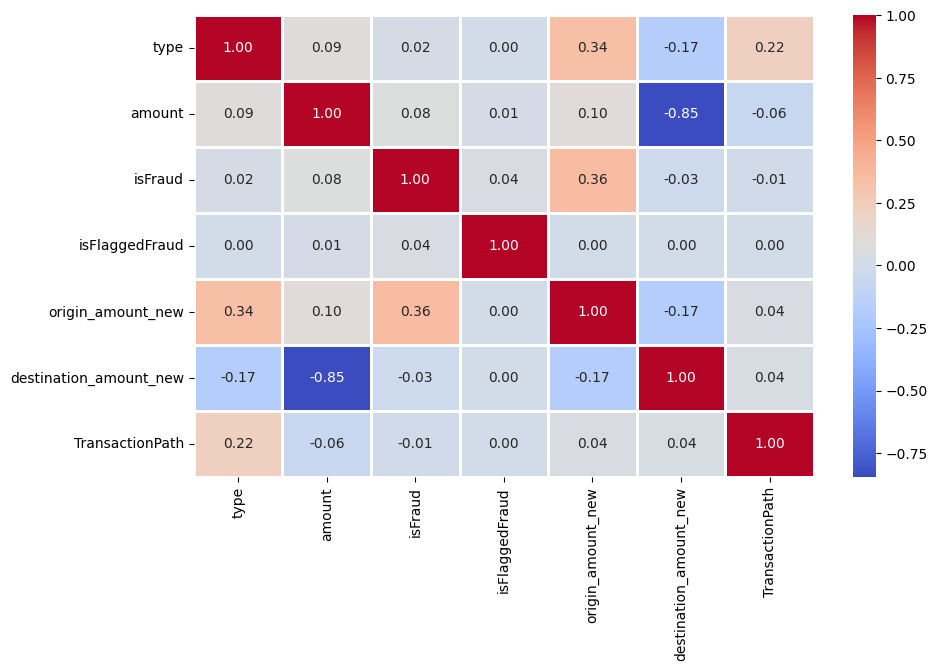

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)

As we can see from the heatmap the coorelation of attributes is not that much that we should drop any of the columns.


*SO WE WILL INCLUDE ALL THE COLUMNS WHICH WE HAVE AFTER ALL THE PRE PROCESSING PART*

**TRAINING AND MODEL BUILDING PART**

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_new.head()

,type,amount,isFraud,isFlaggedFraud,origin_amount_new,destination_amount_new,TransactionPath
0,3,9839.64,0,0,9839.64,0.0,2419963.0
1,3,1864.28,0,0,1864.28,0.0,3922922.0
2,4,181.00,1,0,181.00,0.0,1441841.0
3,1,181.00,1,0,181.00,21182.0,6219958.0
4,3,11668.14,0,0,11668.14,0.0,4274900.0


In [100]:
## Scalling the Amount column

sc = StandardScaler()

df_new['nor_amount'] = sc.fit_transform(df_new['amount'].values.reshape(-1,1))

df_new.drop('amount',axis=1,inplace=True)


In [101]:
df_new.head()

,type,isFraud,isFlaggedFraud,origin_amount_new,destination_amount_new,TransactionPath,nor_amount
0,3,0,0,9839.64,0.0,2419963.0,-0.281560
1,3,0,0,1864.28,0.0,3922922.0,-0.294767
2,4,1,0,181.00,0.0,1441841.0,-0.297555
3,1,1,0,181.00,21182.0,6219958.0,-0.297555
4,3,0,0,11668.14,0.0,4274900.0,-0.278532


In [102]:
#Assigning the dependent and independent variables

y = df_new['isFraud']
X = df_new.drop('isFraud',axis=1)

SPLITTING THE DATA INTO TRAIN AND TEST DATA

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

In [104]:
##checking the shape of the train and test data

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4771965, 6), (1590655, 6), (4771965,), (1590655,))

As we have seen earlier the data set is unbalanced for the two categories of fraud column. So here we will use Decison Tree.  

**MODEL TRAINING PART**

In [117]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [107]:
## Decision Tree Classifier

dt = DecisionTreeClassifier()

dt_model = dt.fit(X_train, y_train)

In [147]:
dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)*100
print('Accuracy of Decision Tree Classifier: ', dt_acc, "%")

Accuracy of Decision Tree Classifier:  99.92399357497384 %


In [153]:
# Confusion matrix 
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
tn, fp, fn, tp = confusion_matrix(y_test, dt_pred).ravel()

print('True Positives: ', tp)
print('True Negatives: ', tn)
print('False Positives: ', fp)
print('False Negatives: ', fn)

True Positives:  1509
True Negatives:  1587937
False Positives:  634
False Negatives:  575


In [167]:
#Classification Report

classification_report_dt = classification_report(y_test, dt_pred)
print("Classification Report - Decision Tree")
print(classification_report_dt)





Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588571
           1       0.70      0.72      0.71      2084

    accuracy                           1.00   1590655
   macro avg       0.85      0.86      0.86   1590655
weighted avg       1.00      1.00      1.00   1590655



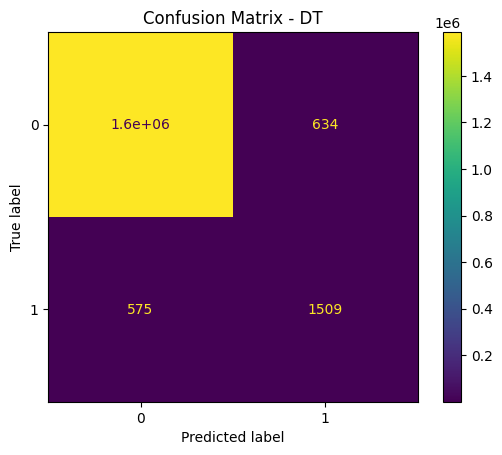

In [157]:
#Visualizing the Decision Tree's confusion matrix

cm = confusion_matrix(y_test, dt_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

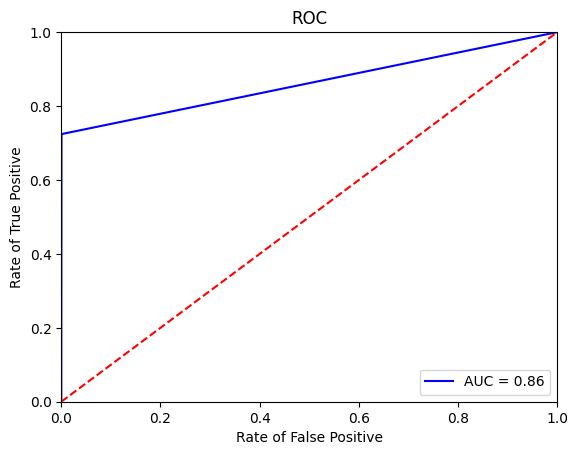

In [159]:
# calculating the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, dt_pred)
roc_auc = metrics.auc(fpr, tpr)


# Plotting/visualising the ROC curve


plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Rate of True Positive')
plt.xlabel('Rate of False Positive')
plt.show()

HERE WE CAN SEE THAT THE AUC OF DECISON TREE IS PRETTY GOOD.

## CONCLUSION

The Decision Tree model utilized in this analysis showcases an impressive accuracy of 99.92% and precision of around 70%. However, in fraud detection scenarios, precision holds paramount importance. We prioritize correctly identifying fraudulent transactions over correctly predicting legitimate ones. Failure to achieve high precision could result in innocent individuals being flagged as fraudulent or actual fraud cases slipping through undetected.

<br>The rationale behind opting for Decision Trees, despite the availability of other algorithms, stems from the nature of the dataset, which is highly imbalanced with a vast majority of legitimate transactions compared to a small fraction of fraudulent ones (99.87% to 0.13%). Decision Trees offer a straightforward approach to understanding such data due to their binary decision-making process.

<br>While alternative models like XGBoost, Bagging, Artificial Neural Networks (ANN), and Logistic Regression may yield impressive accuracy rates, they often fall short in achieving satisfactory precision and recall values. Thus, the Decision Tree model stands out as a favorable choice, emphasizing precision in identifying fraudulent activities while maintaining simplicity and interpretability.

**What are the key factors that predict fraudulent customer?**

The primary indicators for predicting fraudulent customers include:

1. The security status of the request's source.
2. The legitimacy of the organization requesting funds.
3. The transactional history associated with vendors.
4. The amount of money asked

**Do these factors make sense? If yes, How? If not, How not**

Yes, these factors are relevant for predicting fraudulent customers:

1. **Source security**: Unsecured or compromised sources often indicate fraudulent activity.
2. **Organization legitimacy**: Verifying the legitimacy of requesting organizations helps prevent fraudulent transactions.
3. **Vendor transaction history**: Monitoring transactional patterns can detect suspicious behavior.
4. **Transaction amount**: Unusually large or irregular transaction amounts may signal fraudulent intent.

By analyzing these factors, organizations can improve their fraud detection strategies and mitigate risks effectively.

**What kind of prevention should be adopted while company update its infrastructure?**

When updating infrastructure, companies should focus on:

1. **Security Audits**: Regular checks to find vulnerabilities.
2. **Patch Updates**: Keeping systems current to prevent exploitation.
3. **Employee Training**: Educating staff about security risks.
4. **Access Controls**: Restricting access to authorized personnel.
5. **Data Encryption**: Protecting sensitive information.
6. **Network Segmentation**: Isolating parts of the network for security.
7. **Backup Plans**: Regularly backing up data for recovery.
8. **Vendor Risk Management**: Assessing third-party security risks.


**Assuming these actions have been implemented, how would you determine if they work?**

To assess the effectiveness of implemented security measures:

1. **Monitor Incidents and Response time**: Track reductions in security incidents like breaches or malware infections and how fast it is detected.
2. **User Compliance**: Ensure employees adhere to security policies.
3. **Security Metrics**: Analyze key metrics like access controls and patching frequency.
4. **Threat Intelligence**: Keep an eye on emerging threats and align defenses accordingly.
5. **Penetration Testing**: Regularly simulate real-world attacks to validate defenses.
